# How Effective Is Social Distancing?

So far, the effectiveness of social distancing in reducing either the total number of deaths or the maximum fatality rate is not immediately evident in the casestudy data.

To study the impact of social distancing, the Blavatnik School of Government at Oxford University is maintaining a **Government Response Tracker**, providing daily updates on government social distancing implementation across various categories, and providing a helpful aggregate indicator called the **Stringency Index**.

The **Stringency Index** is measured only at the country-level, so, at first, we will aggregate the different regional-level data in the baseframe to the country-level as well.

In [1]:
import pandas as pd
from bokeh.io import output_notebook, show
from casestudy.base import CaseStudy

# required to display Bokeh and matplotlib charts
output_notebook()
%matplotlib inline 
filename = 'baseframe-2020-05-01-04-22-19'
baseframe = pd.read_csv('/Users/spindicate/Documents/programming/zooscraper/casestudy/{}.csv'.format(filename), parse_dates=['date'])

Loading BokehJS ...

In [2]:
from casestudy.constants import MSMTS, MAJOR_CAUSES

excluded_countries = ['China']
excluded_regions = ['Guadeloupe', 'Martinique', 'St Martin', 'Mayotte']

regions = list(baseframe[(~baseframe['country'].isin(excluded_countries)) & (~baseframe['region_name'].isin(excluded_regions))] \
    .sort_values('population', ascending=False) \
    .region_name.unique())[:200]

factors_with_dmas = MSMTS + ['strindex']
factor_dmas = {factor: 28 for factor in factors_with_dmas}
factor_dmas['strindex'] = 14
factors = factors_with_dmas + MAJOR_CAUSES + ['visitors', 'A75PLUSB', 'A65PLUSB', 'gdp']

casestudy = CaseStudy(
    baseframe, regions=regions, count_dma=14, factors=factors, 
    factor_dmas=factor_dmas, start_hurdle=3, start_factor='deaths', 
)

We start by simply looking at a country's maximum fatality rate vs its average stringency index 14 days prior to the ***maximum*** daily fatality rate and its total fatalities.

From this you should two things:

1) You can see that daily rates and total fatalities lead to very similar plots. No surprise that total fatalities would be closely tied to maximum fatalities.
    
2) There isn't a clear correlation between stringency and fatalities. 
* Each level of stringency has regions with high fatalities and low fatalities. 
* Some of the outliers with the lowest stringency have very low death rates.
* There is only ***one*** region with _<60 strindex_ and max rate *>1 death per million*: **Sweden**

# USE COUNTRIES!!!!!!

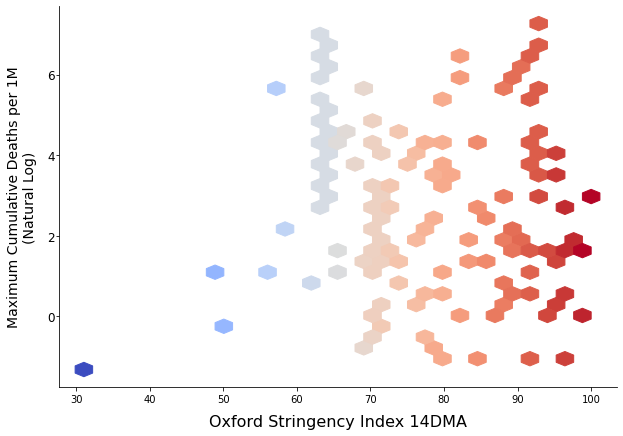

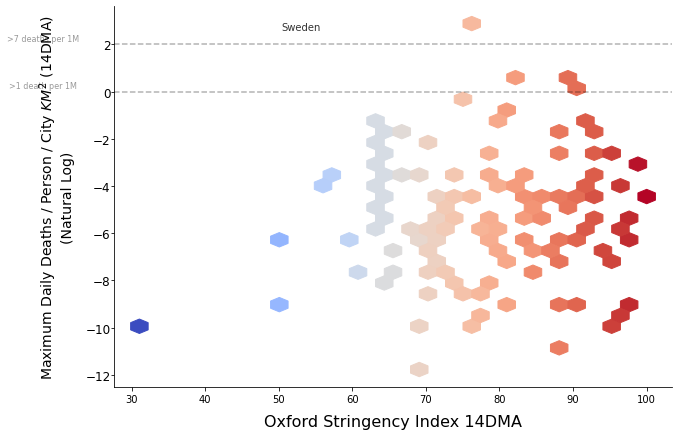

In [3]:
kwargs = {
    'comp_category': 'deaths_per_1M', 'comp_factor': 'strindex_dma', 'comp_factor_start': 'max',
    'fs_xticks': 12, 'fs_yticks': 12, 'fs_xlabel': 16, 'fs_ylabel': 14, 'fs_clabel': 14,
    'width': 10, 'height': 7, 'lognat': True, 'hexsize': 29,
}
plt = casestudy.heatmap.make(**kwargs)

kwargs['comp_category'] = 'deaths_new_dma_per_person_per_city_KM2'
kwargs['annotations'] = [
        [53, 2.75, 'Sweden', {'color': 'black', 'fontsize': 10, 'ha': 'center', 'va': 'center', 'alpha': .8,}],
        [18, 2.25, '>7 deaths per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
        [18, 0.25, '>1 death per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
    ]
kwargs['hlines'] = [2, 0]
plt = casestudy.heatmap.make(**kwargs)

### Strindex for 4 weeks prior to 1st Death

However, if we look *much earlier* in the future, to the two weeks prior to the first death in the region, we can see a bit more of an effect. 

Regions with more stringent actions did seem to have lower death rates more often.

For example, we can see that **no** country with a **strindex <40** experienced  **>1 death per million.**

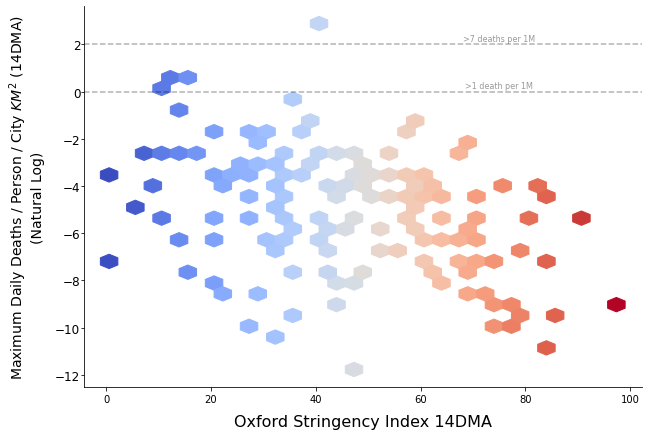

In [4]:
kwargs['comp_factor_start'] = 'start_hurdle'

kwargs['comp_category'] = 'deaths_new_dma_per_person_per_city_KM2'
kwargs['annotations'] = [
        [75, 2.25, '>7 deaths per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
        [75, 0.25, '>1 death per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
    ]
plt = casestudy.heatmap.make(**kwargs)


### Why?

# CEHCK ADHEERENCE THROUGH MOBILITY!!!!!



So what to make of this? Obviously stricter social distancing earlier in the outbreak made for a better outcome. 

But how did a country know to enact social distancing early or not?

We may get a hint at the reason when we compare ***stringency*** and ***uvb radiation

And we see that, for some reason, the warmer regions seem to have implemented more rigorous social distancing practices earlier.

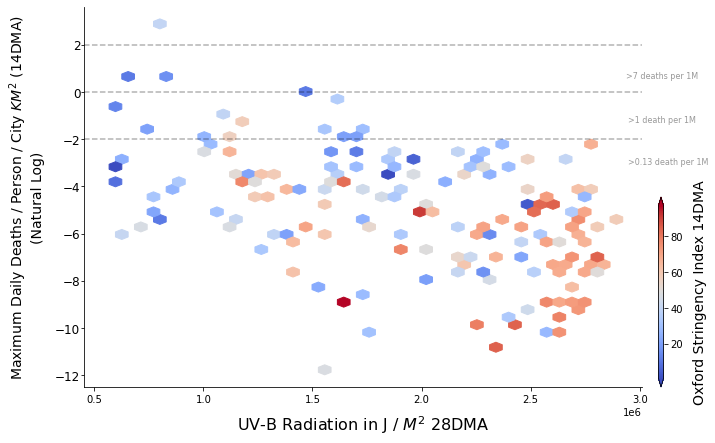

In [5]:
kwargs['comp_factor'] = 'uvb_dma'
kwargs['color_factor_start'] = 'start_hurdle'
kwargs['color_factor'] = 'strindex_dma'
kwargs['hexsize'] = 40
kwargs['hlines'] = [2, 0, -2]
kwargs['annotations'] = [
        [75, 170, '>7 deaths per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
        [75, 145, '>1 death per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
        [195, 122, '>0.13 death per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
    ]
plt = casestudy.heatmap.make(**kwargs)

We have previously observed that warm temperatures and lower elderly population are a potent mix to provide a lower fatality rate.

MAYBE A LINK???????|

In [6]:
df_hm = casestudy.heatmap.df_hm.copy(deep=True)

In [7]:
df_filt = df_hm[(df_hm['uvb_dma'] >= 2.5*10**6) & (df_hm['strindex_dma'] > 65)]

In [8]:
df_filt

,region_id,region_name,deaths_new_dma_per_person_per_city_KM2,uvb_dma,strindex_dma
150,558,Parana,-7.168175,2.845306e+06,66.296429
110,466,Oman,-7.111403,2.796485e+06,84.806429
164,573,Paraiba,-7.164949,2.783587e+06,69.725714
163,572,Amazonas,-2.142382,2.759306e+06,67.402143
167,578,Piaui,-6.241123,2.758393e+06,66.296429
159,567,Maranhao,-5.204095,2.754775e+06,70.122857
82,414,Guatemala,-9.035094,2.744720e+06,75.000000
57,319,Bolivia,-5.262564,2.735612e+06,81.957143
162,571,Rio Grande Do Norte,-7.571891,2.728786e+06,69.328571
76,390,El Salvador,-9.181509,2.724118e+06,73.810000


In [9]:
regions = [(name, 0) for name in list(df_filt.region_name.unique())]

In [10]:
df_filt = df_hm[(df_hm[kwargs['comp_category']] >= -2) & (df_hm['strindex_dma'] < 50)]

In [11]:
df_filt

,region_id,region_name,deaths_new_dma_per_person_per_city_KM2,uvb_dma,strindex_dma
117,474,Portugal,-1.699913,1.737138e+06,29.837857
34,91,Louisiana,-1.750104,1.690364e+06,20.295714
13,65,New Jersey,-1.721086,1.642252e+06,20.295714
133,503,Turkey,-0.208510,1.621643e+06,35.661429
24,77,Massachusetts,-1.455229,1.578564e+06,36.854286
27,81,Connecticut,-1.722210,1.564719e+06,28.518571
125,491,Spain,0.016871,1.457032e+06,11.110000
4,41,Emilia-Romagna,-1.106909,1.078987e+06,39.671429
2,36,Lombardia,-1.722801,9.935785e+05,26.435714
78,407,France,0.708249,8.467978e+05,16.188571


In [12]:
regions += [(name, 1) for name in list(df_filt.region_name.unique())]

In [13]:
color_factors = [tup[1] for tup in regions]

In [14]:
regions = [tup[0] for tup in regions]

In [15]:
from bokeh.palettes import Category20b, Viridis256
casestudy = CaseStudy(
    baseframe, regions=regions, factors=factors_with_dmas, factor_dmas=factor_dmas, 
    count_dma=14, start_hurdle=0, start_factor='', 
)
kwargs ={
    'color_factor': color_factors,
    'width': 925,
    'legend': False,
    'palette_base': Category20b[20], 
    
}
p = casestudy.comp_chart.make(comp_category='strindex_dma', comp_type='multiline', **kwargs)
show(p)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [132]:
excluded_countries = ['China']
excluded_regions = ['Guadeloupe', 'Martinique', 'St Martin', 'Mayotte']
included_countries = ['USA']
region_filter = (
    (~baseframe['country'].isin(excluded_countries)) 
    & (~baseframe['region_name'].isin(excluded_regions))
#     & (baseframe['country_code'].isin(included_countries))
)

regions = list(baseframe[region_filter] \
    .sort_values('population', ascending=False) \
    .region_name.unique())[:200]

In [133]:
factors_with_dmas = MSMTS + ['strindex']
factor_dmas = {factor: 28 for factor in factors_with_dmas}
factor_dmas['strindex'] = 14

casestudy = CaseStudy(
    baseframe, regions=regions, factors=factors_with_dmas, factor_dmas=factor_dmas, 
    count_dma=5, start_hurdle=1, start_factor='deaths', min_days_from_start=1, min_deaths=1,
)

In [134]:
df_hb = casestudy.df.copy(deep=True)

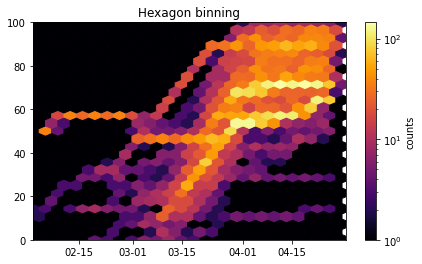

In [138]:
import pylab as pl
fig, ax = plt.subplots(figsize=(7, 4))
x = df_hb.date
x = pl.date2num(x)
# x = df_hb.days
y = df_hb.strindex_dma
hb = ax.hexbin(x, y, gridsize=25, cmap='inferno', bins='log')
ax.axis([x.min(), x.max(), y.min(), y.max()])
ax.xaxis_date()
ax.xaxis.major.formatter.scaled[1.0] = "%m-%d"
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

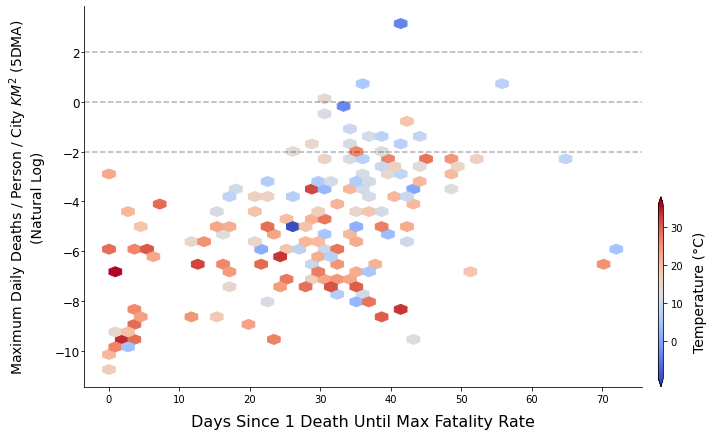

In [139]:
kwargs = {
    'comp_category': 'deaths_new_dma_per_person_per_city_KM2', 'comp_factor': 'max_days', 'comp_factor_start': 'max',
    'fs_xticks': 12, 'fs_yticks': 12, 'fs_xlabel': 16, 'fs_ylabel': 14, 'fs_clabel': 14,
    'width': 10, 'height': 7, 'lognat': True, 'hexsize': 20,
}

kwargs['color_factor_start'] = 'start_hurdle'
kwargs['color_factor'] = 'temp'
kwargs['hexsize'] = 40
kwargs['hlines'] = [2, 0, -2]
kwargs['annotations'] = [
#         [75, 170, '>7 deaths per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
#         [75, 145, '>1 death per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
#         [195, 122, '>0.13 death per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
    ]
plt = casestudy.heatmap.make(**kwargs)

In [141]:
casestudy.heatmap.df_hm.sort_values(by='max_days', ascending=True).iloc[:40]

,region_id,region_name,deaths_new_dma_per_person_per_city_KM2,max_days,temp
68,353,Hong Kong,-10.743097,0,17.075739
111,461,Nicaragua,-9.830674,0,31.016138
66,339,Chad,-8.900647,0,NaN
79,395,Ethiopia,-5.763527,0,28.834100
148,518,Zambia,-9.869121,0,22.113611
48,297,Angola,-10.001623,0,20.797083
151,527,Libya,-2.917571,0,22.661127
107,456,Aruba,-6.875827,1,35.842188
150,523,Syria,-9.072043,1,14.950769
71,377,Costa Rica,-9.690428,2,34.214777


In [142]:
from bokeh.palettes import Category20b
regions = list(baseframe[baseframe.region_id == 304].sort_values(by='deaths', ascending=False).region_name.unique())[:10]

factors_with_dmas = MSMTS + ['strindex']
factor_dmas = {factor: 28 for factor in factors_with_dmas}
factor_dmas['strindex'] = 14

casestudy = CaseStudy(
    baseframe, regions=regions, factors=factors_with_dmas, factor_dmas=factor_dmas,
    count_dma=5, start_hurdle=1, start_factor='deaths', min_days_from_start=1, min_deaths=1,
)
# 1) Pop. adjusted cumulative fatalities
# label_offsets = {
#     'Netherlands': {'x_offset': 5, 'y_offset': -20},
#     'United Kingdom': {'x_offset': -40, 'y_offset': 3},
#     'Iran': {'x_offset': -15, 'y_offset': 0},
#     'Lombardia': {'x_offset': 0, 'y_offset': -30},
# }
kwargs ={
    'filetitle': 'Cumulative Deaths of Top 10 Most Impacted Regions Excluding Hubei',
    'save_file': False,
    'legend': False,
    'width': 925,
    'label_offsets': label_offsets,
    'palette_base': Category20b[20]
}
p = casestudy.comp_chart.make(comp_category='deaths_new_dma_per_1M', comp_type='multiline', color_factor=[1], **kwargs)
show(p)

[1]


In [143]:
title = 'Max Daily Fatalities v UVB Radiation v Oxford Stringency Index'
subtitle = '*Average UVB radiation and Oxford Stringency Index for two weeks prior to day of 1st fatality'
note = '**Excludes mainland China'

kwargs = {
    'comp_category': 'deaths_new_dma_per_person_per_city_KM2',
    'comp_factor': 'A65PLUSB_%',
    'color_factor': 'uvb_dma',
    'color_factor_start': 'max',
    'annotations': [
#         [-10200, 206.6, title, {'color': 'black', 'fontsize': 16, 'ha': 'left', 'va': 'center',}],
#         [-10200, 200.2, subtitle, {'color': 'black', 'fontsize': 12, 'ha': 'left', 'va': 'center', 'style': 'italic'}],
#         [-10200, 194.2, note, {'color': 'black', 'fontsize': 12, 'ha': 'left', 'va': 'center', 'style': 'italic'}],
#         [-200, 68.1, '>54 deaths per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
#         [-200, 50.4, '>7 deaths per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
#         [-180, 41.5, '>2.7 deaths per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
    ],
    'fs_xticks': 12, 'fs_yticks': 12,
    'fs_xlabel': 16, 'fs_ylabel': 14, 'fs_clabel': 14,
    'width': 12, 'height': 8,
    'lognat': True,
    'hlines': [2,0,-2],
    'hexsize': 34,
#     'save_file': True,    
#     'filename': 'Max Daily Fatalities vs Temperature (unscaled) as of April 29'
}
plt = casestudy.heatmap.make(**kwargs)

KeyError: 'A65PLUSB_%'

In [144]:
title = 'Max Daily Fatalities v UVB Radiation v Oxford Stringency Index'
subtitle = '*Average UVB radiation and Oxford Stringency Index for two weeks prior to day of 1st fatality'
note = '**Excludes mainland China'

kwargs = {
    'comp_category': 'deaths_new_dma_per_1M',
    'comp_factor': 'A65PLUSB_%',
    'color_factor': 'circul_%',
    'color_factor_start': 'max',
    'annotations': [
#         [-10200, 206.6, title, {'color': 'black', 'fontsize': 16, 'ha': 'left', 'va': 'center',}],
#         [-10200, 200.2, subtitle, {'color': 'black', 'fontsize': 12, 'ha': 'left', 'va': 'center', 'style': 'italic'}],
#         [-10200, 194.2, note, {'color': 'black', 'fontsize': 12, 'ha': 'left', 'va': 'center', 'style': 'italic'}],
#         [-200, 68.1, '>54 deaths per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
#         [-200, 50.4, '>7 deaths per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
#         [-180, 41.5, '>2.7 deaths per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
    ],
    'fs_xticks': 12, 'fs_yticks': 12,
    'fs_xlabel': 16, 'fs_ylabel': 14, 'fs_clabel': 14,
    'width': 12, 'height': 8,
    'lognat': True,
    'hlines': [2,0,-2],
#     'save_file': True,    
#     'filename': 'Max Daily Fatalities vs Temperature (unscaled) as of April 29'
}
plt = casestudy.heatmap.make(**kwargs)

KeyError: 'A65PLUSB_%'

## TRAVEL!!!!! ##

In [ ]:

title = 'Max Daily Fatalities v UVB Radiation v Oxford Stringency Index'
subtitle = '*Average UVB radiation and Oxford Stringency Index for two weeks prior to day of 1st fatality'
note = '**Excludes mainland China'

kwargs = {
    'comp_category': 'deaths_new_dma_per_1M',
    'comp_factor': 'visitors_%',
    'color_factor': 'visitors_%',
    'annotations': [
#         [-10200, 206.6, title, {'color': 'black', 'fontsize': 16, 'ha': 'left', 'va': 'center',}],
#         [-10200, 200.2, subtitle, {'color': 'black', 'fontsize': 12, 'ha': 'left', 'va': 'center', 'style': 'italic'}],
#         [-10200, 194.2, note, {'color': 'black', 'fontsize': 12, 'ha': 'left', 'va': 'center', 'style': 'italic'}],
#         [-200, 68.1, '>54 deaths per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
#         [-200, 50.4, '>7 deaths per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
#         [-180, 41.5, '>2.7 deaths per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
    ],
    'fs_xticks': 12, 'fs_yticks': 12,
    'fs_xlabel': 16, 'fs_ylabel': 14, 'fs_clabel': 14,
    'width': 12, 'height': 8,
    'lognat': True,
#     'color_range': (0, .1)
#     'save_file': True,    
#     'filename': 'Max Daily Fatalities vs Temperature (unscaled) as of April 29'
}
plt = casestudy.heatmap.make(**kwargs)

In [146]:
### GDP ###

In [ ]:
title = 'Max Daily Fatalities v UVB Radiation v Oxford Stringency Index'
subtitle = '*Average UVB radiation and Oxford Stringency Index for two weeks prior to day of 1st fatality'
note = '**Excludes mainland China'

kwargs = {
    'comp_category': 'gdp_%',
    'comp_factor': 'A75PLUSB_%',
#     'color_factor': 'gdp_%',
    'annotations': [
#         [-10200, 206.6, title, {'color': 'black', 'fontsize': 16, 'ha': 'left', 'va': 'center',}],
#         [-10200, 200.2, subtitle, {'color': 'black', 'fontsize': 12, 'ha': 'left', 'va': 'center', 'style': 'italic'}],
#         [-10200, 194.2, note, {'color': 'black', 'fontsize': 12, 'ha': 'left', 'va': 'center', 'style': 'italic'}],
#         [-200, 68.1, '>54 deaths per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
#         [-200, 50.4, '>7 deaths per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
#         [-180, 41.5, '>2.7 deaths per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'alpha': .4,}],
    ],
    'fs_xticks': 12, 'fs_yticks': 12,
    'fs_xlabel': 16, 'fs_ylabel': 14, 'fs_clabel': 14,
    'width': 12, 'height': 8,
    'lognat': False,
#     'color_range': (0, .1)
#     'save_file': True,    
#     'filename': 'Max Daily Fatalities vs Temperature (unscaled) as of April 29'
}
plt = casestudy.heatmap.make(**kwargs)

# Next Section

Click on this link to go to the next notebook: [04 - Linear Regression](04%20-%20See19%20-%20Linear%20Regression.ipynb)